In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# basic imports 
import numpy as np
import matplotlib.pyplot as plt

# Build dataset

In [2]:
from proj1_helpers import load_csv_data 

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

In [3]:
from outliers import handle_outliers

# handle outliers
X_raw, y = handle_outliers(input_data_raw, y_raw, -999, 'mean')

# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

-999 are replaced by the mean value of the feature


In [4]:
# get feature names 
all_features_raw = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])

In [5]:
from extend_features import extend_features

# feature degree
degree = 1

# extend feature set
all_candidates, features = extend_features(X_raw, all_features_raw, degree, is_add_log = True)
print(all_candidates.shape)

---------------------------
Features have been set to the power(s): [1]
16 Features of the momentum have been added
4 logarithmic features have been added.
Data have been standardized.
---------------------------
(250000, 50)


In [6]:
# choose the features
ind_features = [1, 13, 4, 46, 0, 11, 44, 43, 7, 2, 16, 48, 10, 6, 49, 22, 45, 12, 19, 23, 32, 24, 17, 14, 39, 42, 30, 31, 47, 38, 20]
Xsw = all_candidates[:, ind_features]
print(Xsw.shape)

(250000, 31)


# Fix gamma manually (check for convergence when the degre is low or high)

In [14]:
from build_poly import build_poly
from implementations import logistic_regression

# model
model = dict()
model['method'] = 'lr'
model['loss'] = 'loglikelihood'

# optimization params
model['gamma'] = 1e-5
model['method_minimization'] = 'gd'
model['initial_w'] = np.zeros(Xsw.shape[1])
model['threshold'] = 1000
model['max_iters'] = 10000
model['debug_mode'] = 0

In [15]:
# logistic regression
w_tot, loss_tot = logistic_regression(y, Xsw, model['initial_w'], model['max_iters'], model['gamma'], model['method_minimization'], model['threshold'], model['debug_mode'] )

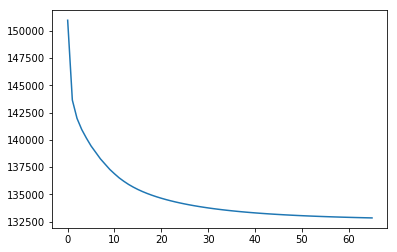

In [16]:
plt.plot(loss_tot)